In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import interpolate, optimize

In [2]:
df = pd.read_csv('./bubble_data')
df.drop('Unnamed: 0', axis=1, inplace=True)
l = np.array(df.l)
b = np.array(df.b)
T_0 = np.array(df.T_0)
T_1 = np.array(df.T_1)
# df

# Uninterpolated Scatterplots

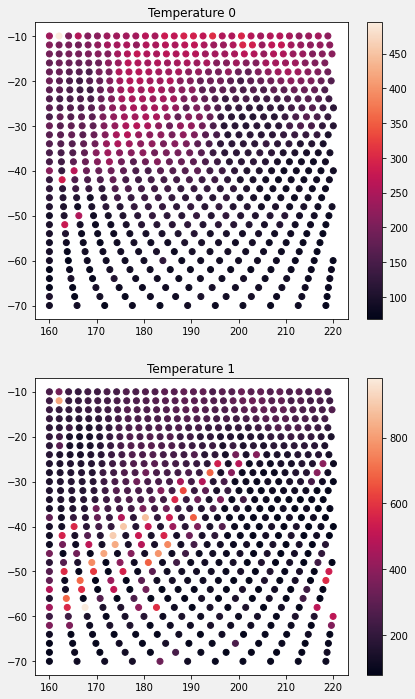

In [132]:
fig, ax = plt.subplots(figsize=[7, 12], facecolor='#f1f1f1', nrows=2)
cmap = ax[0].scatter(l, b, c=T_0, cmap='rocket')
ax[0].set_title('Temperature 0')
cmap2 = ax[1].scatter(l, b, c=T_1, cmap='rocket')
ax[1].set_title('Temperature 1')
fig.colorbar(cmap, ax=ax[0])
fig.colorbar(cmap2, ax=ax[1])

# Side-By-Side Comparison of Interpolation Schemes

Text(0.5, 1.0, 'Temperature Channel 1, Cubic')

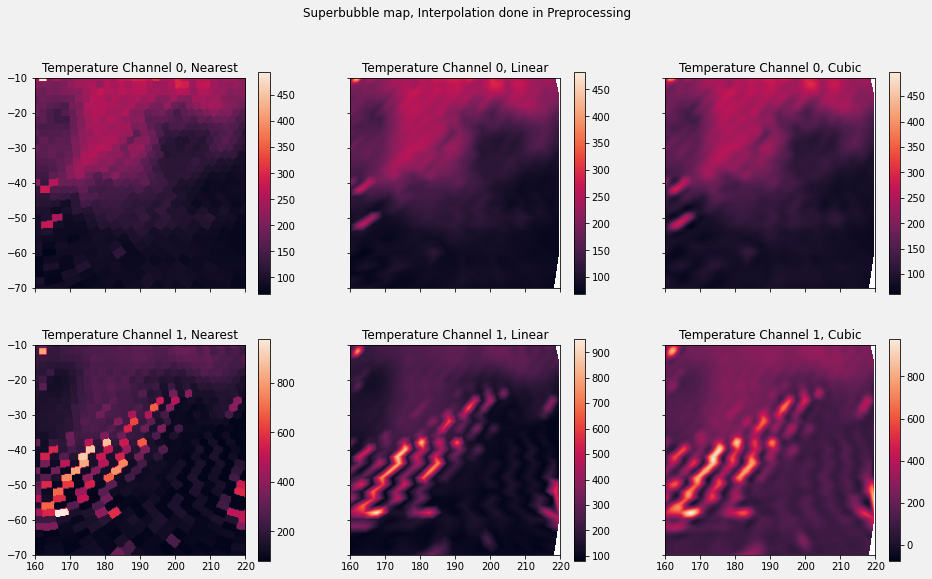

In [141]:
fig, ax = plt.subplots(figsize=[16, 9], facecolor='#f1f1f1', ncols=3, nrows=2, squeeze=True, sharex=True, sharey=True)
# fig.tight_layout()
grid_x, grid_y = np.mgrid[l.min():l.max():200j, b.min():b.max():200j]
points = (l, b)
grid_z00 = interpolate.griddata(points, T_0, (grid_x, grid_y), method='nearest')
grid_z01 = interpolate.griddata(points, T_0, (grid_x, grid_y), method='linear')
grid_z02 = interpolate.griddata(points, T_0, (grid_x, grid_y), method='cubic')

grid_z10 = interpolate.griddata(points, T_1, (grid_x, grid_y), method='nearest')
grid_z11 = interpolate.griddata(points, T_1, (grid_x, grid_y), method='linear')
grid_z12 = interpolate.griddata(points, T_1, (grid_x, grid_y), method='cubic')

im=[0, 0, 0, 0, 0, 0, 0, 0]
# plt.imshow(t_interp)

im[0] = ax[0, 0].imshow(grid_z00.T, extent=[160, 220, -70, -10], origin='lower', cmap='rocket')
fig.colorbar(im[0], ax=ax[0, 0])
fig.suptitle('Superbubble map, Interpolation done in Preprocessing')
ax[0, 0].set_title('Temperature Channel 0, Nearest')

im[1] = ax[0, 1].imshow(grid_z01.T, extent=[160, 220, -70, -10], origin='lower', cmap='rocket')
fig.colorbar(im[1], ax=ax[0, 1])
ax[0, 1].set_title('Temperature Channel 0, Linear')

im[2] = ax[0, 2].imshow(grid_z02.T, extent=[160, 220, -70, -10],origin='lower', cmap='rocket')
fig.colorbar(im[2], ax=ax[0, 2])
ax[0, 2].set_title('Temperature Channel 0, Cubic')


im[3] = ax[1, 0].imshow(grid_z10.T, extent=[160, 220, -70, -10], origin='lower', cmap='rocket')
fig.colorbar(im[3], ax=ax[1, 0])
fig.suptitle('Superbubble map, Interpolation done in Preprocessing')
ax[1, 0].set_title('Temperature Channel 1, Nearest')

im[4] = ax[1, 1].imshow(grid_z11.T, extent=[160, 220, -70, -10],origin='lower', cmap='rocket')
fig.colorbar(im[4], ax=ax[1, 1])
ax[1, 1].set_title('Temperature Channel 1, Linear')

im[5] = ax[1, 2].imshow(grid_z12.T, extent=[160, 220, -70, -10], origin='lower', cmap='rocket')
fig.colorbar(im[5], ax=ax[1, 2])
ax[1, 2].set_title('Temperature Channel 1, Cubic')

# # fig, ax = plt.subplots(figsize=[12,9], facecolor='#f1f1f1')
# im2 = ax[1,0].imshow(grid_z2.T, extent=[160, 220, -70, -10], origin='lower', cmap='rocket')
# ax[1, 0].set_title('Temperature Channel 1')
# fig.colorbar(im2, ax=ax[1, 0])

# Side-By-Side with Uninterpolated Data

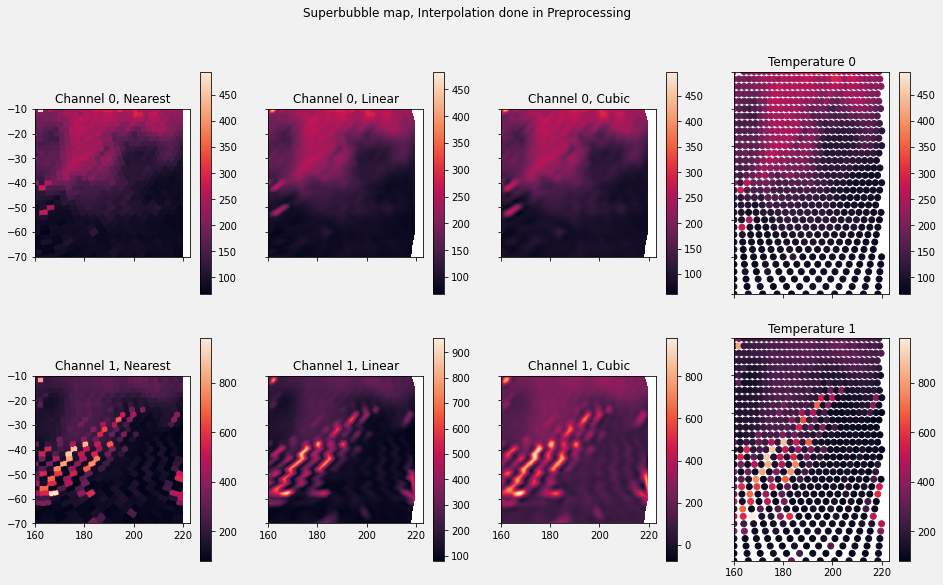

In [140]:
fig, ax = plt.subplots(figsize=[16, 9], facecolor='#f1f1f1', ncols=4, nrows=2, squeeze=True, sharex=True, sharey=True)
# fig.tight_layout()
grid_x, grid_y = np.mgrid[l.min():l.max():200j, b.min():b.max():200j]
points = (l, b)
grid_z00 = interpolate.griddata(points, T_0, (grid_x, grid_y), method='nearest')
grid_z01 = interpolate.griddata(points, T_0, (grid_x, grid_y), method='linear')
grid_z02 = interpolate.griddata(points, T_0, (grid_x, grid_y), method='cubic')

grid_z10 = interpolate.griddata(points, T_1, (grid_x, grid_y), method='nearest')
grid_z11 = interpolate.griddata(points, T_1, (grid_x, grid_y), method='linear')
grid_z12 = interpolate.griddata(points, T_1, (grid_x, grid_y), method='cubic')

im=[0, 0, 0, 0, 0, 0, 0, 0]
# plt.imshow(t_interp)

im[0] = ax[0, 0].imshow(grid_z00.T, extent=[160, 220, -70, -10], origin='lower', cmap='rocket')
fig.colorbar(im[0], ax=ax[0, 0])
fig.suptitle('Superbubble map, Interpolation done in Preprocessing')
ax[0, 0].set_title('Channel 0, Nearest')

im[1] = ax[0, 1].imshow(grid_z01.T, extent=[160, 220, -70, -10], origin='lower', cmap='rocket')
fig.colorbar(im[1], ax=ax[0, 1])
ax[0, 1].set_title('Channel 0, Linear')

im[2] = ax[0, 2].imshow(grid_z02.T, extent=[160, 220, -70, -10],origin='lower', cmap='rocket')
fig.colorbar(im[2], ax=ax[0, 2])
ax[0, 2].set_title('Channel 0, Cubic')


im[3] = ax[1, 0].imshow(grid_z10.T, extent=[160, 220, -70, -10], origin='lower', cmap='rocket')
fig.colorbar(im[3], ax=ax[1, 0])
fig.suptitle('Superbubble map, Interpolation done in Preprocessing')
ax[1, 0].set_title('Channel 1, Nearest')

im[4] = ax[1, 1].imshow(grid_z11.T, extent=[160, 220, -70, -10],origin='lower', cmap='rocket')
fig.colorbar(im[4], ax=ax[1, 1])
ax[1, 1].set_title('Channel 1, Linear')

im[5] = ax[1, 2].imshow(grid_z12.T, extent=[160, 220, -70, -10], origin='lower', cmap='rocket')
fig.colorbar(im[5], ax=ax[1, 2])
ax[1, 2].set_title('Channel 1, Cubic')

cmap = ax[0, 3].scatter(l, b, c=T_0, cmap='rocket')
ax[0, 3].set_title('Temperature 0')
cmap2 = ax[1, 3].scatter(l, b, c=T_1, cmap='rocket')
ax[1, 3].set_title('Temperature 1')
fig.colorbar(cmap, ax=ax[0, 3])
fig.colorbar(cmap2, ax=ax[1, 3])

# Legacy Code

In [126]:
# fig, ax = plt.subplots(figsize=[16,9], facecolor='#f1f1f1', ncols=2)
# ls, bs = np.meshgrid(np.linspace(160,220,40), np.linspace(-10,-70,40))
# spline = interpolate.NearestNDInterpolator((l, b), T_0)
# t_interp = spline(ls, bs)
# # plt.imshow(t_interp)
# im = ax[0].imshow(t_interp, extent=[160, 220, -70, -10], interpolation='spline36', cmap='rocket')
# fig.colorbar(im, ax=ax[0])
# fig.suptitle('Superbubble map using Interpolation to fill')
# ax[0].set_title('Temperature Channel 0')
# grid_x, grid_y = np.mgrid[l.min():l.max():200j, b.min():b.max():200j]
# points = (l, b)
# values=T_1
# grid_z2 = interpolate.griddata(points, values, (grid_x, grid_y), method='cubic')
# # fig, ax = plt.subplots(figsize=[12,9], facecolor='#f1f1f1')
# im2 = ax[1].imshow(grid_z2.T, extent=[160, 220, -70, -10], origin='lower', cmap='rocket', interpolation='gaussian')
# ax[1].set_title('Temperature Channel 1')
# fig.colorbar(im2, ax=ax[1])